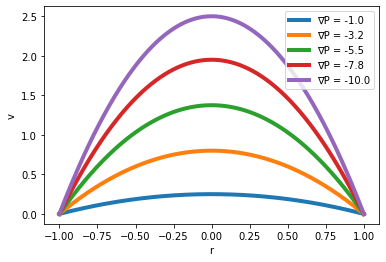

In [265]:
#Problem 1
///
Use collocation to determine the velocity profile as a function of pressure drop from the stokes equation
The stokes equation describes the viscous flow in a pipe
(1/r)(d/dr) * r(dv/dr) = (dp/dz)

boundary conditions
v(-1) = 0
v(1) = 0
///

import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import *
from scipy.optimize import root
%matplotlib inline
#define N and the collocation points

#d/dr (r *(dv/dr)) = (1)*(dv/dr) + r*(d2v/dr2)
def stokes(a,delp,N):
    rc = np.linspace(-1,1,N+1)
    #represent the coefficients as a plolynomial
    v = Polynomial(a)
    #calculate the derivatives of v 
    dv = v.deriv(1) - 0
    dv2 = v.deriv(2) - 0
    
    #set up equations and boundary conditions
    eqn = (1/rc)*dv(rc) + dv2(rc) - delp
    eqn[0] = v(-1) 
    eqn[-1] = v(1) 
    return eqn


#create plotting function 
def stokesplt(delpvals,rvals,N):
#iterate through the different deltap values to creat each polynomial equation
#plist[0] will be the polynomial equation when delta p = -1
    plist = []
    for i in delpvals:
        sol = root(lambda a: stokes(a,i,N),np.ones(N+1))
        p = Polynomial(sol.x)
        plist.append(p)
    Legend = ['\u2207P = %.1f'%i for i in delpvals]
    #plot the polynomail against rvals by inputting rvals into the polynomial eqn
    for pi in range(0,len(plist)):
        plt.plot(rvals,plist[pi](rvals),lw = 4)
    plt.legend(Legend)
    plt.xlabel('r')
    plt.ylabel('v')
    plt.show()

rvals = np.linspace(-1,1,1000)
delpvals = [-1.0,-3.2,-5.5,-7.8,-10.0]

N = 9
stokesplt(delpvals,rvals,N)

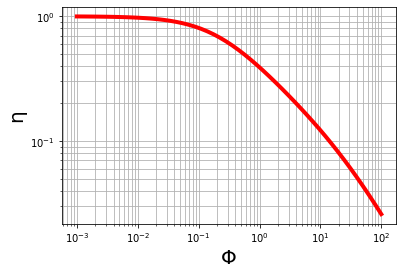

In [297]:
#Problem 2
///
Use collocation to determine the effectiveness factor (eta) as a function fo the tiele moodulus (phi)
The following differential equation can be used to model the diffusion within a catalyst
d2c(x)/dx2 = (phi)c**2(x)

boundary conditions
c(1) = 1
d/dx c(-1) = 0

eta = (1/2*phi)*(d/dx c(1))
///
#define equation that solves for concentration
def diff(a,thiele,N):
    xc = np.linspace(-1,1,N+1)
    
    c = Polynomial(a)
    dc = c.deriv(1)
    dc2 = c.deriv(2)
    
    c_eqn = dc2(xc) - thiele*(c(xc))**2
    c_eqn[0] = dc(-1) - 0
    c_eqn[-1] = c(1) - 1
    
    return c_eqn

#define an effectivnes factor equation 
def eff_fact(thiele, eqn):
    dc = eqn.deriv(1)
    eta = (1/(2*thiele))*dc(1)
    return eta

def plotter(thiele,N):
    eta_list = []
    #loop through different thiele values
    
    for i in thiele:
        #first find the equation of concentration to input into eff_fact
        sol = root(lambda a: diff(a,i,N),0.5*np.ones(N+1))
        p = Polynomial(sol.x)
        #input the solved equation in eff_fact
        solve_eta = eff_fact(i,p)
        eta_list.append(solve_eta)
    #plot the eta values vs thiele values
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(which = 'both')
    plt.xlabel('Φ',fontsize = 20)
    plt.ylabel('η',fontsize = 20)
    plt.plot(thiele,eta_list,'r',lw = 4)
    plt.show()

thiele = np.logspace(-3,2,50)
N = 7
plotter(thiele,N)



#Program might take some time to run

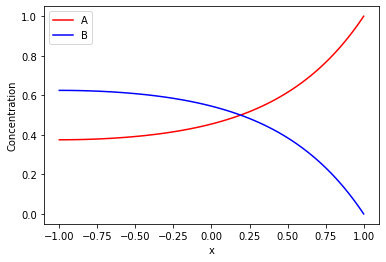

In [268]:
#Problem 3
///
The following catalyst system involves diffusion and the reversible reaction A <-> B. this system can be described by the two coupled differnetial equations
d2(A)/dx2 = kA - B, A(1) = 1, d(A(-1))/dx = 0
d2(B)/dx2 = -kA+B, B(1) = 0, d(B(-1))/dx = 0 
generate a plot with k = 2
///
def rxn(q,N,k):
    xc = np.linspace(-1,1,N+1)
    #use np.split in order to separate a 1D array into 2 1D arrays. Must do this in order to work with roots later
    a,b = np.split(q,2)
    A = Polynomial(a)
    B = Polynomial(b)
    dA = A.deriv(1)
    dB = B.deriv(1)
    dA2 = A.deriv(2)
    dB2 = B.deriv(2)
    
    eqnA = dA2(xc) - k*A(xc) + B(xc)
    eqnB = dB2(xc) + k*A(xc) - B(xc)
    eqnA[0] = dA(-1) - 0
    eqnA[-1] = A(1) - 1
    eqnB[0] = dB(-1) - 0
    eqnB[-1] = B(1) - 0
    
    #must return a 1D array from this equation using flatten() in order for roots to work properly
    #the return will give 2*(N+1) coefficients in the form of a 1D array
    conc = np.array([eqnA,eqnB]).flatten()
    return conc

def rxnplotter(xvals,N,k):
    initialguess = [np.random.rand(N+1),np.random.rand(N+1)]
    sol = root(lambda w: rxn(w,N,k),initialguess)
    #since return equation is a 1D array, the first N+1 indices will be the a coefficients, and the last 
    # N+1 coefficients will be the B coefficients
    #Can use np.split to sepearate the return array from sol.x
    Acoeff, Bcoeff = np.split(sol.x,2)
    
    
    #take the solved for coefficients and turn them into a polynomial eqn
    Apoly = Polynomial(Acoeff)
    Bpoly = Polynomial(Bcoeff)
    
    #plot the xvals and outputs of the polynomials
    plt.plot(xvals,Apoly(xvals),color = 'r')
    plt.plot(xvals,Bpoly(xvals),color = 'b')
    plt.legend(['A','B'])
    plt.xlabel('x')
    plt.ylabel('Concentration')
    plt.show()
    
xvals = np.linspace(-1,1,100)
N = 10
k = 2
rxnplotter(xvals,N,k)

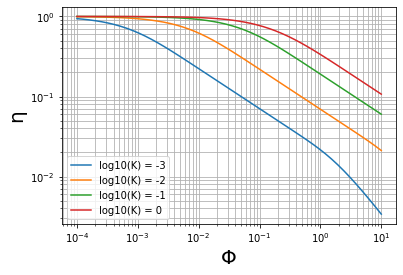

In [310]:
#problem 4
///
From question 2, the reaction is now reversible 2A <-> B
equations
d2(ca(x))/dx2 = -phica(x)**2 + (1/K)*phicb(x)
d2(cb(x))/dx2 = 0.5*phica(x)**2 - (1/2*K)*phicb(x)

boundary conditions
ca(1) = 1
d(ca(-1))/dx = 0
cb(1) = 0
d(cb(-1))/dx = 0

determine how the effectiveness factor varies as a function of phi and K
///
def revrxn(w,thiele,K,N):
    #generate collocation points
    xc = np.linspace(-1,1,N+1)
    #split the input array into two sections. Needs to be done because input array is a 1D array, not 2D
    a,b = np.split(w,2)
    
    #represent the conc equations as polynomials so it is easier to differentiate
    ca = Polynomial(a)
    cb = Polynomial(b)
    dca = ca.deriv(1)
    dcb = cb.deriv(1)
    dca2 = ca.deriv(2)
    dcb2 = cb.deriv(2)
    
    #define equations and boundary conditions to solve
    caeqn = dca2(xc) - thiele*ca(xc)**2 + (1/K)*thiele*cb(xc)
    caeqn[0] = dca(-1) - 0
    caeqn[-1] = ca(1) - 1
    
    cbeqn = dcb2(xc) + 0.5*thiele*ca(xc)**2 - (1/(2*K))*thiele*cb(xc)
    cbeqn[0] = dcb(-1) - 0
    cbeqn[-1] = cb(1) - 0
    
    return np.array([caeqn,cbeqn]).flatten()

def revrxnplot(thiele,K,N):
    initialguess = [0.1*np.random.rand(N+1),0.1*np.random.rand(N+1)]
    eta_a = 0*thiele
    #iterate through different K values with different thiele values
    for ki in range(len(K)):
        for thielei in range(len(thiele)):
            sol = root(lambda w: revrxn(w,thiele[thielei],K[ki],N), initialguess)
            #root returns 1D array, so split the result into both a and b coeff
            acoeff,bcoeff = np.split(sol.x,2)
            #turn the coefficients into polynomial
            apoly = Polynomial(acoeff)
            #solve the eta value using eff_fact defined in earlier problem 
            etasolved = eff_fact(thiele[thielei],apoly)
            #add eta value to the empty array
            eta_a[thielei] = etasolved
        #plot the eta_a. Once the loop goes to the next K, the eta_a values will be overwritten
        plt.plot(thiele,eta_a)
    #turn the list into an array, and then split evenly to make separate arrays for the different K values used
    
    
    #make log10 k for legend
    logk = []
    for i in K:
        logk.append(np.log10(i))
        
    #plot the function 
    Legend = ['log10(K) = %i'%i for i in logk]  
    plt.legend(Legend)
    plt.xlabel('Φ',fontsize = 20)
    plt.ylabel('η',fontsize = 20)
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(which = 'both')
    plt.show()

K = np.logspace(-3,0,4)
thiele = np.logspace(-4,1,50)
N = 20
revrxnplot(thiele,K,N)

#program might take some time to run